In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df = pd.read_csv("/Users/nikhi/Desktop/sentiment_analysis/IMDB_Dataset/IMDB_Dataset.csv", encoding='ISO-8859-1')

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df = df.drop_duplicates()

In [11]:
df = df.dropna()

In [12]:
def remove_stopwords(text):
    text = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and word not in stop_words]
    return ' '.join(text)


In [13]:
# Convert sentiment labels to numeric
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Redefine labels after conversion
x = df['review'].apply(remove_stopwords)
y = df['sentiment']

In [16]:
max_word = 20000
max_length = 200

In [15]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_word)
tokenizer.fit_on_texts(x)

In [17]:
sequences = tokenizer.texts_to_sequences(x)
x = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)

In [22]:
# model parameter
vocab_size = 1000
embedding_dim = 128
max_length = 200
oov_tok = "<OOV>"
training_portion = 0.7
BATCH_SIZE = 32

In [19]:
#train- test split
train_size = int(df.shape[0] * training_portion)
train_sentences, test_sentences, train_labels, test_labels = train_test_split(x, y, test_size=1-training_portion ,random_state=42)

In [20]:
#load embedding from tensorflow hub
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/1")

In [24]:
# define the CNN model

model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_word, output_dim=embedding_dim,input_shape=(max_length,)),
    keras.layers.Conv1D(128, 5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


# model = keras.Sequential([
#     # Note the change in input_shape here
#     keras.layers.Embedding(input_dim=max_word, output_dim=embedding_dim, input_length=max_length),
#     keras.layers.Conv1D(128, 5, activation='relu'),
#     keras.layers.GlobalMaxPooling1D(),
#     keras.layers.Conv1D(64, 5, activation='relu'),
#     keras.layers.GlobalMaxPooling1D(),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     # Changed to softmax for multi-class classification if needed
#     keras.layers.Dense(2, activation='softmax')  
# ])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 196, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,650,369 (10.11 MB)

 Trainable params: 2,650,369 (10.11 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#train model
num_epochs = 10

history = model.fit(train_sentences, train_labels, epochs=num_epochs,batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7398 - loss: 0.4799 - val_accuracy: 0.8810 - val_loss: 0.2896
Epoch 2/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9445 - loss: 0.1539 - val_accuracy: 0.8781 - val_loss: 0.3315
Epoch 3/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9923 - loss: 0.0341 - val_accuracy: 0.8753 - val_loss: 0.4267
Epoch 4/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9994 - loss: 0.0048 - val_accuracy: 0.8744 - val_loss: 0.5422
Epoch 5/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 1.0000 - loss: 3.4793e-04 - val_accuracy: 0.8781 - val_loss: 0.5834
Epoch 6/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 1.0000 - loss: 9.7953e-05 - val_accuracy: 0.8781 - val_loss: 0.6169
Epoch 7/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 1.0000 - loss: 5.0174e-05 - val_accuracy: 0.8787 - val_loss: 0.6494
Epoch 8/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 1.0000 - los

In [26]:
model.save_weights('CNN_model-1_IMDB_Dataset.weights.h5')

In [ ]:
# model = keras.Sequential([
#     keras.layers.Embedding(input_dim=max_word, output_dim=256, input_shape=(max_length,)),
#     keras.layers.SpatialDropout1D(0.3),
#     keras.layers.Conv1D(128, 5, activation='relu', padding='same'),
#     keras.layers.MaxPooling1D(pool_size=2),
#     keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
#     keras.layers.GlobalMaxPooling1D(),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# # Learning rate scheduling
# initial_learning_rate = 0.001
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=100,
#     decay_rate=0.9,
#     staircase=True)

# optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
# model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# #train model
# num_epochs = 5

# history_2 = model.fit(train_sentences, train_labels, epochs=num_epochs,batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/5
977/977 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.7041 - loss: 0.5123 - val_accuracy: 0.8657 - val_loss: 0.3067
Epoch 2/5
977/977 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9350 - loss: 0.1805 - val_accuracy: 0.8833 - val_loss: 0.3029
Epoch 3/5
977/977 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9719 - loss: 0.0953 - val_accuracy: 0.8744 - val_loss: 0.3404
Epoch 4/5
977/977 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9822 - loss: 0.0670 - val_accuracy: 0.8804 - val_loss: 0.3526
Epoch 5/5
977/977 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9841 - loss: 0.0563 - val_accuracy: 0.8790 - val_loss: 0.3583


In [27]:

y_pred = model.predict(test_sentences)


465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [28]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [29]:
cm = confusion_matrix(test_labels, y_pred_binary)

In [30]:
class_names = ['Negative', 'Positive']
report = classification_report(test_labels, y_pred_binary, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      7404
    Positive       0.88      0.89      0.89      7471

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



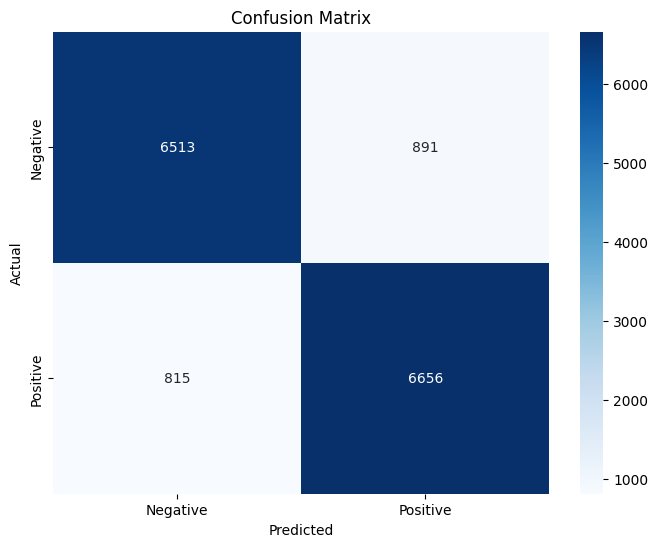

In [31]:
# create a more colorful confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

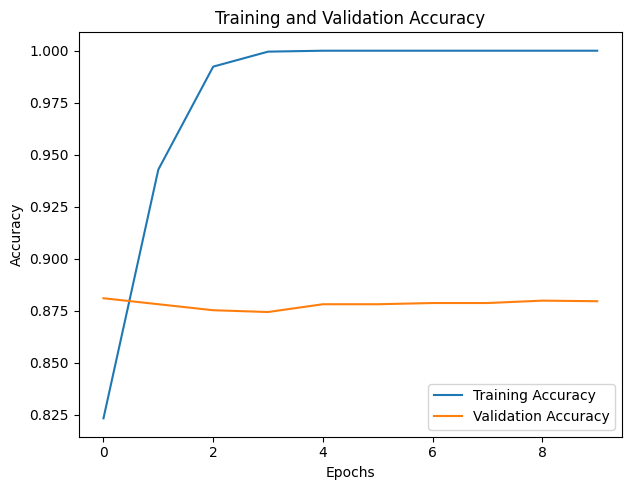

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

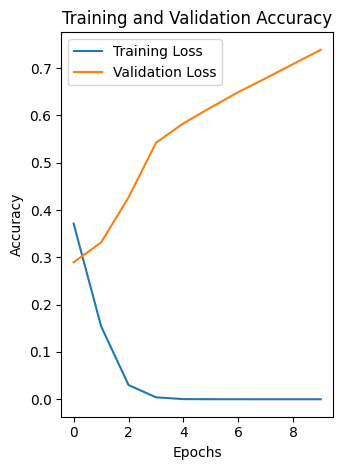

In [33]:

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()